<a href="https://colab.research.google.com/github/Kanka-goswami/IISc_CDS_2302064/blob/main/Kanka_Copy_of_M2_NB_MiniProject_3_Emotion_Classification_from_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Speech Emotion Classification

## Problem Statement

Build a model to recognize emotion from speech using Ensemble learning

## Learning Objectives

At the end of the mini-project, you will be able to :

* extract the features from audio data
* implement ML classification algorithms individually and as Ensembles, to classify emotions
* record the voice sample and test it with trained model

## Dataset

**TESS Dataset**

The first dataset chosen for this mini-project is the [TESS](https://dataverse.scholarsportal.info/dataset.xhtml?persistentId=doi:10.5683/SP2/E8H2MF) (Toronto emotional speech set) dataset. It contains 2880 files.  A set of 200 target words were spoken in the carrier phrase "Say the word _____' by two actresses and the sets were recorded in seven different emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). Both actresses spoke English as their first language, were university educated, and had musical training. Audiometric testing indicated that both actresses had thresholds within the normal range.

**Ravdess Dataset**

The second dataset chosen for this mini-project is [Ravdess](https://zenodo.org/record/1188976#.YLczy4XivIU) (The Ryerson Audio-Visual Database of Emotional Speech and Song). This dataset contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

**File naming convention**

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

**Filename identifiers**

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: `03-01-06-01-02-01-12.wav`

    - Audio-only - 03
    - Speech - 01
    - Fearful - 06
    - Normal intensity - 01
    - Statement "dogs" - 02
    - 1st Repetition - 01
    - 12th Actor - 12 Female, as the actor ID number is even.

## Information

**Speech Emotion Recognition (SER)** is the task of recognizing the emotion from  speech, irrespective of the semantics. Humans can efficiently perform this task as a natural part of speech communication, however, the ability to conduct it automatically using programmable devices is a field of active research.

Studies of automatic emotion recognition systems aim to create efficient, real-time methods of detecting the emotions of mobile phone users, call center operators and customers, car drivers, pilots, and many other human-machine communication users. Adding emotions to machines forms an important aspect of making machines appear and act in a human-like manner

Lets gain familiarity with some of the audio based features that are commonly used for SER.

**Mel scale** — The mel scale (derived from the word *melody*) is a perceptual scale of pitches judged by listeners to be equal in distance from one another. The reference point between this scale and normal frequency measurement is defined by assigning a perceptual pitch of 1000 mels to a 1000 Hz tone, 40 dB above the listener's threshold. Above about 500 Hz, increasingly large intervals are judged by listeners to produce equal pitch increments. Refer [here](https://towardsdatascience.com/learning-from-audio-the-mel-scale-mel-spectrograms-and-mel-frequency-cepstral-coefficients-f5752b6324a8) for more detailed information.

**Pitch** — how high or low a sound is. It depends on frequency, higher pitch is high frequency

**Frequency** — speed of vibration of sound, measures wave cycles per second

**Chroma** — Representation for audio where spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma). Computed by summing the log frequency magnitude spectrum across octaves.

**Fourier Transforms** — used to convert from time domain to frequency domain. Time domain shows how signal changes over time. Frequency domain shows how much of the signal lies within each given frequency band over a range of frequencies

**Librosa**

[Librosa](https://librosa.org/doc/latest/index.html) is a Python package, built for speech and audio analytics. It provides modular functions that simplify working with audio data and help in achieving a wide range of applications such as identification of the personal characteristics of different individuals' voice samples, detecting emotions from audio samples etc.

For further details on the Librosa package, refer [here](https://conference.scipy.org/proceedings/scipy2015/pdfs/brian_mcfee.pdf).


### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1kGJfpEC9dayjApciCYZr04NWT7XWkRhV/view?usp=sharing) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.


Guide notebooks:
1. https://www.kaggle.com/code/ejlok1/audio-emotion-part-1-explore-data?scriptVersionId=20844990
2. https://www.kaggle.com/code/ejlok1/audio-emotion-part-2-feature-extract

## Grading = 10 Points

### Import Neccesary Packages

In [1]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import pandas as pd
import IPython.display as ipd
from matplotlib import pyplot as plt
from datetime import datetime
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
import warnings
warnings.filterwarnings('ignore')
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import VotingClassifier

In [2]:

#@title Download the datasets and install packages
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Ravdess_Tess.zip
!unzip -qq Ravdess_Tess.zip
# Install packages
!pip -qq install librosa soundfile
!pip -qq install wavio
print("Datasets downloaded successfully!")


Datasets downloaded successfully!


### Work-Flow

* Load the TESS audio data and extract features and labels

* Load the Ravdess audio data and extract features

* Combine both the audio dataset features

* Train and test the model with TESS + Ravdess Data

* Record the team audio samples and add them to TESS + Ravdess data

* Train and test the model with TESS + Ravdess + Team Recorded (combined) data

* Test each of the models with live audio sample recording.

### Load the Tess data and Ravdess data audio files (1 point)

Hint: `glob.glob`

Author's quote:\
Notebook Collaborators

- Eu Jin Lok (Owner)
- Ee Kin Chin (Viewer)
- Zach (Viewer)

> "At my early beginings embarking on this journey, I learnt through the hard way that male and **female speakers have to be trained seperately or the model will struggle to get a good accuracy.** From reading a few blogs and articles, it seems female has a higher pitch that male. So if we don't tag the gender label to the audio file, it won't be able to detect anger or fear if it was a male speaker. It will just get bucketed into neutral. Lets specifically model the 2 speakers seperately. Note that there's a 'calm' emotion and a 'neutral' emotion as seperate. I don't really know the difference but for now, I'll just combined them into the same category."


##### **TESS dataset**

In [3]:
TESS = '/content/Tess/'
dir_list = os.listdir(path= '/content/Tess')
print(dir_list)

['YAF_neutral', '.ipynb_checkpoints', 'OAF_Fear', 'YAF_happy', 'OAF_neutral', 'OAF_happy', 'OAF_disgust', 'YAF_angry', 'YAF_sad', 'YAF_disgust', 'YAF_surprised', 'OAF_angry', 'YAF_fear', 'OAF_Sad', 'OAF_surprised']


In [4]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir("/content/Tess/" + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append("/content/Tess/" + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df['gender'] = 'female'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

disgust    391
Unknown    387
happy      383
angry      382
fear       379
sad        379
neutral    378
Name: labels, dtype: int64

In [5]:
TESS_df.head()

,labels,source,gender,path
0,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_cheek_neutral.wav
1,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_yearn_neutral.wav
2,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_tire_neutral.wav
3,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_thought_neutral.wav
4,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_mop_neutral.wav


###### Play the sample audio

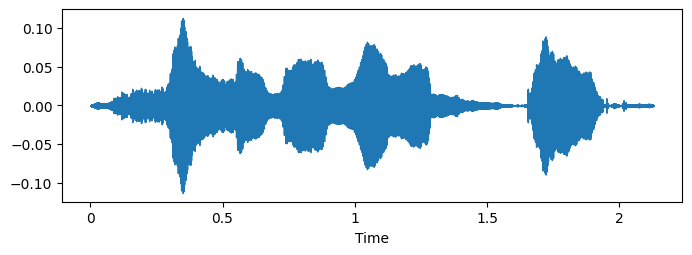

In [6]:
# lets play a fearful track
fname = TESS + 'OAF_happy/OAF_date_happy.wav'

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(8, 2.5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio
ipd.Audio(fname)

##### **Ravdess dataset**

In [7]:
RAV = '/content/ravdess/'
dir_list = os.listdir(RAV)
dir_list.sort()
print(dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [8]:
emotion = []
gender = []
path = []
for i in dir_list:

    fname = os.listdir(RAV + i +'/')

    #/content/ravdess/Actor_01/03-01-01-01-01-01-01_neutral.wav
    for f in fname:

        part = f.split('.')[0].split('-')

        emotion.append(int(part[2]))
        temp = int(part[6].split('_')[0])
        if temp%2 == 0:
            act = "female"
        else:
            act = "male"
        gender.append(act)
        path.append(RAV + i + '/' + f)


RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','labels']
#RAV_df['labels'] = RAV_df.emotion
RAV_df['source'] = 'RAVDESS'

RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
#RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

sad         183
fear        182
surprise    182
disgust     180
angry       179
happy       174
neutral      88
Name: labels, dtype: int64

In [9]:
RAV_df.head()

,gender,labels,source,path
0,male,angry,RAVDESS,/content/ravdess/Actor_01/03-01-05-02-01-01-01...
1,male,sad,RAVDESS,/content/ravdess/Actor_01/03-01-04-02-02-01-01...
2,male,fear,RAVDESS,/content/ravdess/Actor_01/03-01-06-02-01-02-01...
3,male,surprise,RAVDESS,/content/ravdess/Actor_01/03-01-08-01-01-02-01...
4,male,angry,RAVDESS,/content/ravdess/Actor_01/03-01-05-02-01-02-01...


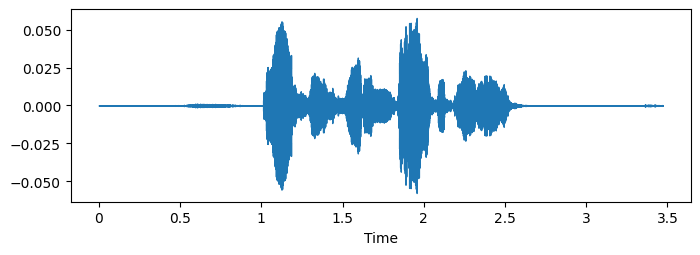

In [10]:
# Pick a fearful track
fname = '/content/ravdess/Actor_06/03-01-03-01-02-01-06_happy.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(8, 2.5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio
ipd.Audio(fname)

##### Team's Recordings

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
# Create directory
#os.mkdir('Records')

In [13]:
RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
    emt = input("Enter emotion(label) to save the recording: ")
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('Records/audio_'+current_time+"_"+emt+'.wav','wb') as f:
      f.write(b)
    return 'Records/audio_'+current_time+"_"+emt+'.wav'

In [14]:
# Say any of the word with emotion in the following format
# "SAY THE WORD HAPPY"
#TESS_df['labels'].unique()

In [15]:
# Use the naming convention
# emotion_gender eg. happy_male
#record()

In [16]:
# synced folder directory
#REC = '/content/drive/MyDrive/CDS_TEAM_6/Records'
#dir_list = os.listdir(REC)
#dir_list.sort()
#print(dir_list)

In [17]:
# Display recorded waveforms
#fname = '/content/drive/MyDrive/CDS_TEAM_6/Records/audio_2024-03-07_06-28-22_angry_male.wav'
#data, sampling_rate = librosa.load(fname)
#plt.figure(figsize=(8, 2.5))
#librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio
#ipd.Audio(fname)

In [18]:
'''
# Constructing dataframe
emotion = []
gender = []
path = []
for i in dir_list:
    f_name = i.split('_')[-2].split('.')[0]
    A_name = i.split('_')[-1].split('.')[0]

    emotion.append(f_name)
    gender.append(A_name)
    path.append(REC+ '/' +i)

REC_df = pd.DataFrame(emotion)
REC_df.columns = ['labels']
REC_df ['source'] = 'CDS7Team6'
REC_df = pd.concat([REC_df,pd.DataFrame(gender, columns = ['gender'])],axis=1)
REC_df = pd.concat([REC_df,pd.DataFrame(path, columns = ['path'])],axis=1)
REC_df.value_counts()
'''

"\n# Constructing dataframe\nemotion = []\ngender = []\npath = []\nfor i in dir_list:\n    f_name = i.split('_')[-2].split('.')[0]\n    A_name = i.split('_')[-1].split('.')[0]\n\n    emotion.append(f_name)\n    gender.append(A_name)\n    path.append(REC+ '/' +i)\n\nREC_df = pd.DataFrame(emotion)\nREC_df.columns = ['labels']\nREC_df ['source'] = 'CDS7Team6'\nREC_df = pd.concat([REC_df,pd.DataFrame(gender, columns = ['gender'])],axis=1)\nREC_df = pd.concat([REC_df,pd.DataFrame(path, columns = ['path'])],axis=1)\nREC_df.value_counts()\n"

In [19]:
#REC_df.head()

In [20]:
#!zip -r /content/Records.zip /content/Records

In [21]:
#from google.colab import files
#files.download("/content/Records.zip")

### Data Exploration and Visualization (1 point)

#### Visualize the distribution of all the labels

<Axes: >

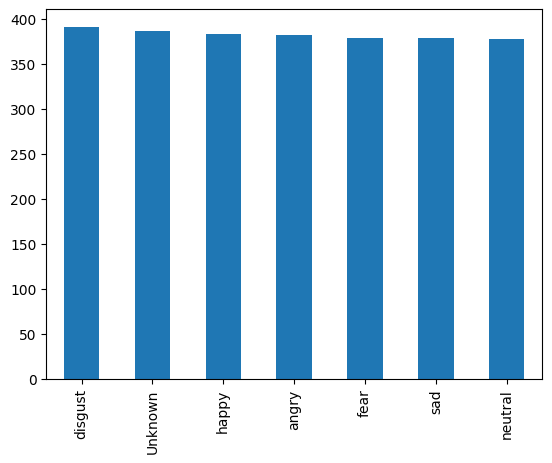

In [22]:
tess_labels = TESS_df['labels'].value_counts()
tess_labels.plot(kind= 'bar')

<Axes: >

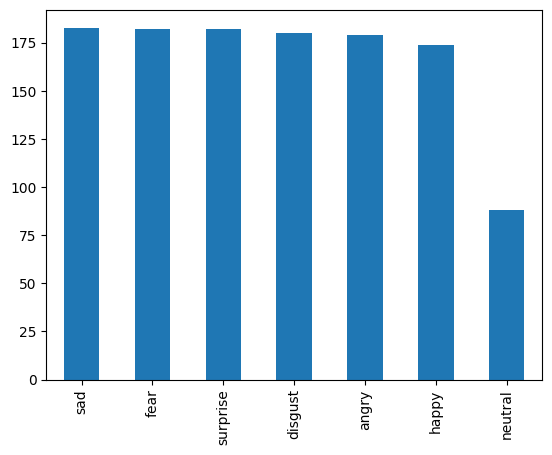

In [23]:
rev_labels = RAV_df['labels'].value_counts()
rev_labels.plot(kind= 'bar')

In [24]:
#rec_labels = REC_df['labels'].value_counts()
#rec_labels.plot(kind= 'bar')

In [25]:
all_df = pd.concat([TESS_df, RAV_df], join= 'inner')
all_df = all_df.reset_index(drop= True)
all_df

,labels,source,gender,path
0,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_cheek_neutral.wav
1,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_yearn_neutral.wav
2,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_tire_neutral.wav
3,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_thought_neutral.wav
4,neutral,TESS,female,/content/Tess/YAF_neutral/YAF_mop_neutral.wav
...,...,...,...,...
3842,sad,RAVDESS,female,/content/ravdess/Actor_24/03-01-04-02-01-02-24...
3843,happy,RAVDESS,female,/content/ravdess/Actor_24/03-01-03-01-01-01-24...
3844,disgust,RAVDESS,female,/content/ravdess/Actor_24/03-01-07-02-01-01-24...
3845,surprise,RAVDESS,female,/content/ravdess/Actor_24/03-01-08-02-01-01-24...


<Axes: >

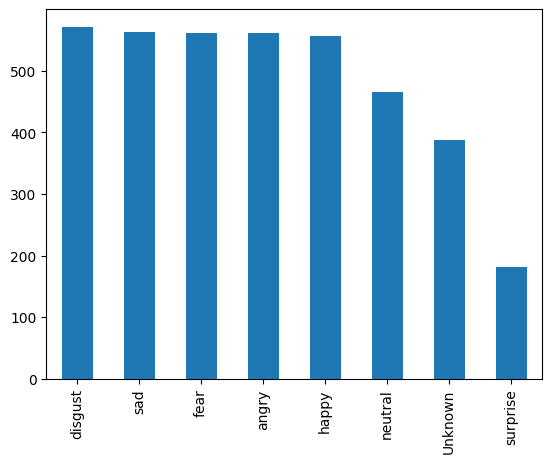

In [26]:
all_labels = all_df['labels'].value_counts()
all_labels.plot(kind= 'bar')

#### Visualize sample audio signal using librosa

/content/Tess/YAF_fear/YAF_germ_fear.wav


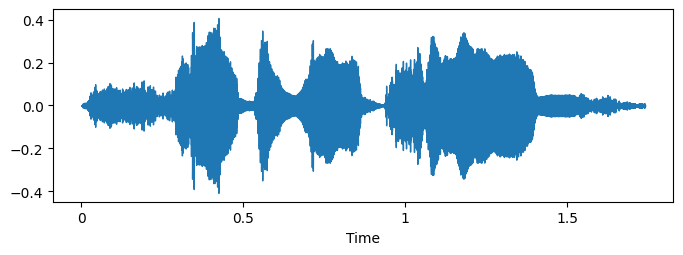

In [28]:
fname = all_df['path'].loc[2247]
print(fname)
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(8, 2.5))
librosa.display.waveshow(data, sr=sampling_rate)

# Lets play the audio
ipd.Audio(fname)

### Feature extraction (2 points)

Read one WAV file at a time using `Librosa`. An audio time series in the form of a 1-dimensional array for mono or 2-dimensional array for stereo, along with time sampling rate (which defines the length of the array), where the elements within each of the arrays represent the amplitude of the sound waves is returned by `librosa.load()` function. Refer to the supplementary notebook ('Audio feature extraction')

To know more about Librosa, explore the [link](https://librosa.org/doc/latest/feature.html)

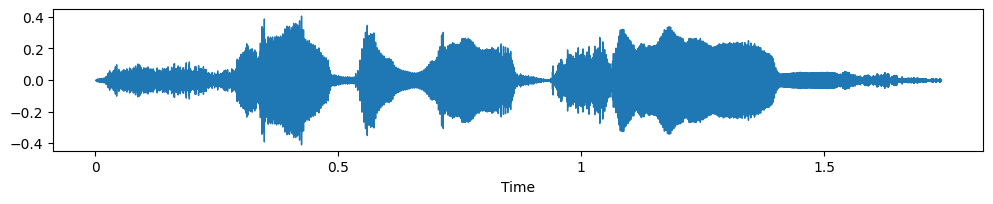

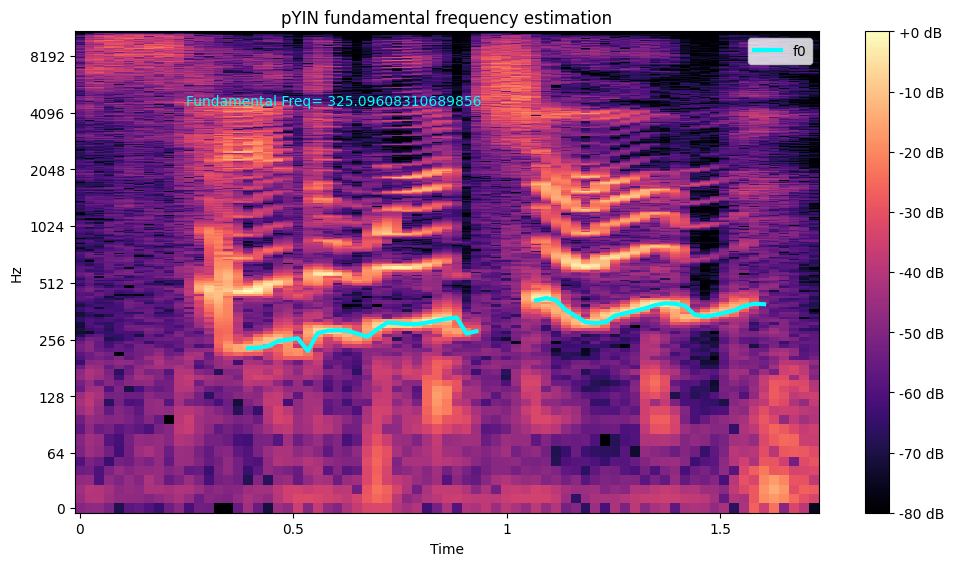

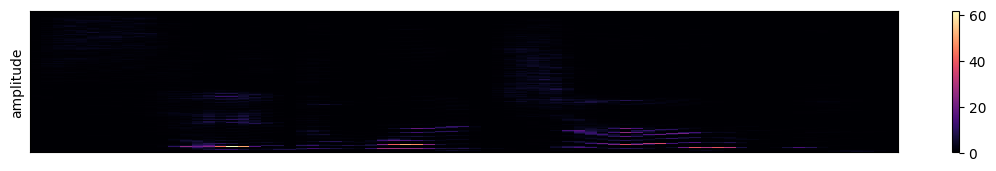

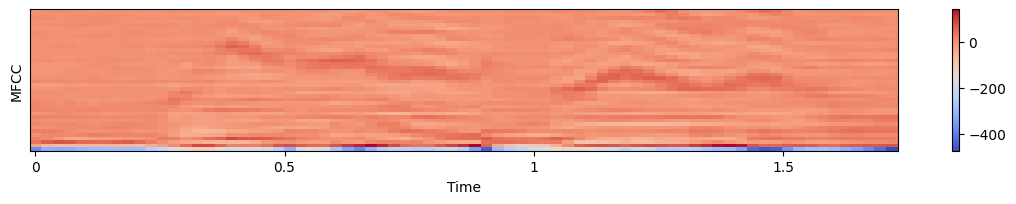

In [29]:
X, sample_rate = librosa.load(fname)
stft=np.abs(librosa.stft(X))
mfcc = librosa.feature.mfcc(y=X, sr= sample_rate, n_mfcc= 40)

# calculating Fundamental frequency (F0) estimation using probabilistic YIN (pYIN)
f0, voiced_flag, voiced_probs = librosa.pyin(X,
                                             fmin=librosa.note_to_hz('C0'),
                                             fmax=librosa.note_to_hz('C7'))
times = librosa.times_like(f0)

# audio wave
plt.figure(figsize=(12,6.25))
plt.subplot(3,1,1)
librosa.display.waveshow(X, sr= sample_rate)

# Fundamental frequency
D = librosa.amplitude_to_db(np.abs(librosa.stft(X)), ref=np.max)
fig, ax = plt.subplots(figsize= (12,6.25))
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')
ax.text(x=0.25,y= 4500,s= ('Fundamental Freq= '+ str(np.nanmean(f0))), color= 'cyan')

# stft
plt.figure(figsize=(14,6.25))
plt.subplot(3,1,1)
librosa.display.specshow(stft)
plt.ylabel('amplitude')
plt.colorbar()

# MFCC
plt.figure(figsize=(14,6.25))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis= 'time')
plt.ylabel('MFCC')
plt.colorbar()


# Audio play
ipd.Audio(fname)

In [30]:
from scipy.fft import rfft, rfftfreq
from scipy.signal import find_peaks
def extract_fft (x,sr):
    chunks = np.array_split(x,int(sr/2000))
    peaks = []
    for chunk in chunks:
        wave = chunk
        freq_mag = rfft(wave)
        freq_val = rfftfreq(sr,1/sr)
        # find the max. magnitude
        max_positive_freq_idx = np.argmax(freq_mag[:sr//2 + 1])
        peaks.append(freq_val[max_positive_freq_idx])

    return peaks

In [33]:
def extract_feature(file_name):
    # load audio
    X, sample_rate = librosa.load(file_name)
    # apply stft()
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    # compute pitch
    pitch = extract_fft(X,sample_rate)

    # combine the features
    result=np.hstack((result,pitch))
    # compute mfcc
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    # combine the features
    result=np.hstack((result, mfccs))
    # compute chroma features and combine
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result=np.hstack((result, chroma))
    # compute melspectrogram and combine
    mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [34]:
print(extract_feature(fname).shape)

(191,)


In [35]:
fet_results = [extract_feature(x) for x in all_df['path']]

In [36]:
pd.DataFrame(fet_results)

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,1893.0,84.0,82.0,42.0,121.0,119.0,40.0,953.0,85.0,42.0,...,1.267039e-03,1.207545e-03,2.072306e-03,3.381512e-03,3.873123e-03,8.421329e-04,4.477691e-04,5.827275e-04,4.166939e-04,4.055154e-05
1,1594.0,98.0,101.0,34.0,34.0,99.0,100.0,33.0,33.0,33.0,...,4.853056e-03,6.495222e-03,5.553484e-03,5.624961e-03,2.942385e-03,1.398742e-03,2.170881e-03,2.521297e-03,2.059247e-03,1.656030e-04
2,3.0,36.0,35.0,36.0,35.0,141.0,105.0,3.0,173.0,134.0,...,1.474753e-03,1.997139e-03,1.975467e-03,2.237218e-03,2.167352e-03,8.504920e-04,1.488729e-03,1.631911e-03,8.645168e-04,5.836758e-05
3,1754.0,111.0,38.0,113.0,39.0,295.0,113.0,4.0,185.0,184.0,...,4.108476e-03,3.786854e-03,4.971947e-03,5.394136e-03,2.914727e-03,1.013836e-03,1.088678e-03,1.433909e-03,1.471097e-03,1.304270e-04
4,1608.0,72.0,73.0,37.0,36.0,36.0,36.0,33.0,140.0,143.0,...,7.301046e-04,1.253463e-03,1.497512e-03,1.355541e-03,6.617717e-04,4.302528e-04,4.764440e-04,4.935040e-04,3.789444e-04,2.756043e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,187.0,175.0,157.0,1234.0,259.0,246.0,213.0,205.0,222.0,90.0,...,8.099296e-16,6.036008e-16,4.580974e-16,3.824521e-16,2.457335e-16,1.789764e-16,1.451123e-16,3.709284e-16,7.625759e-16,4.741994e-16
3843,0.0,442.0,438.0,191.0,297.0,150.0,269.0,139.0,66.0,58.0,...,3.421335e-14,2.447831e-14,1.863298e-14,1.471264e-14,1.200260e-14,1.014372e-14,8.849463e-15,8.084487e-15,7.519295e-15,7.155511e-15
3844,382.0,193.0,111.0,209.0,274.0,297.0,277.0,261.0,242.0,67.0,...,3.864747e-14,2.959158e-14,2.391170e-14,2.014387e-14,1.747630e-14,1.554970e-14,1.417050e-14,1.323149e-14,1.274987e-14,1.226001e-14
3845,0.0,1557.0,1849.0,151.0,278.0,343.0,287.0,199.0,720.0,17.0,...,1.507500e-14,1.088551e-14,9.302079e-15,7.090779e-15,4.602935e-15,3.647313e-15,3.109193e-15,3.537372e-15,4.503422e-15,4.292062e-15


In [37]:
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder()
one_hot_enc.fit(all_df['gender'].to_numpy().reshape(-1, 1))
one_hot_enc.categories_
one_hot_fet = one_hot_enc.transform(all_df['gender'].to_numpy().reshape(-1, 1))
all_fet = np.hstack((one_hot_fet.toarray(), fet_results))
pd.DataFrame(all_fet)

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,1.0,0.0,1893.0,84.0,82.0,42.0,121.0,119.0,40.0,953.0,...,1.267039e-03,1.207545e-03,2.072306e-03,3.381512e-03,3.873123e-03,8.421329e-04,4.477691e-04,5.827275e-04,4.166939e-04,4.055154e-05
1,1.0,0.0,1594.0,98.0,101.0,34.0,34.0,99.0,100.0,33.0,...,4.853056e-03,6.495222e-03,5.553484e-03,5.624961e-03,2.942385e-03,1.398742e-03,2.170881e-03,2.521297e-03,2.059247e-03,1.656030e-04
2,1.0,0.0,3.0,36.0,35.0,36.0,35.0,141.0,105.0,3.0,...,1.474753e-03,1.997139e-03,1.975467e-03,2.237218e-03,2.167352e-03,8.504920e-04,1.488729e-03,1.631911e-03,8.645168e-04,5.836758e-05
3,1.0,0.0,1754.0,111.0,38.0,113.0,39.0,295.0,113.0,4.0,...,4.108476e-03,3.786854e-03,4.971947e-03,5.394136e-03,2.914727e-03,1.013836e-03,1.088678e-03,1.433909e-03,1.471097e-03,1.304270e-04
4,1.0,0.0,1608.0,72.0,73.0,37.0,36.0,36.0,36.0,33.0,...,7.301046e-04,1.253463e-03,1.497512e-03,1.355541e-03,6.617717e-04,4.302528e-04,4.764440e-04,4.935040e-04,3.789444e-04,2.756043e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,1.0,0.0,187.0,175.0,157.0,1234.0,259.0,246.0,213.0,205.0,...,8.099296e-16,6.036008e-16,4.580974e-16,3.824521e-16,2.457335e-16,1.789764e-16,1.451123e-16,3.709284e-16,7.625759e-16,4.741994e-16
3843,1.0,0.0,0.0,442.0,438.0,191.0,297.0,150.0,269.0,139.0,...,3.421335e-14,2.447831e-14,1.863298e-14,1.471264e-14,1.200260e-14,1.014372e-14,8.849463e-15,8.084487e-15,7.519295e-15,7.155511e-15
3844,1.0,0.0,382.0,193.0,111.0,209.0,274.0,297.0,277.0,261.0,...,3.864747e-14,2.959158e-14,2.391170e-14,2.014387e-14,1.747630e-14,1.554970e-14,1.417050e-14,1.323149e-14,1.274987e-14,1.226001e-14
3845,1.0,0.0,0.0,1557.0,1849.0,151.0,278.0,343.0,287.0,199.0,...,1.507500e-14,1.088551e-14,9.302079e-15,7.090779e-15,4.602935e-15,3.647313e-15,3.109193e-15,3.537372e-15,4.503422e-15,4.292062e-15


In [38]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
scaled_features = std_scale.fit_transform(fet_results)

In [39]:
pd.DataFrame(scaled_features)

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,1.403597,-0.241691,-0.303905,-0.622442,0.043868,0.098861,-0.428816,3.740262,-0.222265,-0.363239,...,-0.302148,-0.325255,-0.266566,-0.175160,0.029864,-0.284625,-0.349882,-0.348289,-0.357073,-0.356835
1,1.047799,-0.200239,-0.247832,-0.703857,-0.539330,-0.089574,-0.162104,-0.457290,-0.582887,-0.398328,...,0.220784,0.270707,0.041306,0.007788,-0.087714,-0.167781,-0.056492,-0.094518,-0.070973,-0.138223
2,-0.845426,-0.383811,-0.442612,-0.683503,-0.532626,0.306139,-0.139879,-0.594166,0.388017,-0.004559,...,-0.271858,-0.236262,-0.275131,-0.268474,-0.185622,-0.282870,-0.172640,-0.210945,-0.279071,-0.325690
3,1.238193,-0.161748,-0.433759,0.100112,-0.505813,1.757085,-0.104317,-0.589604,0.471237,0.190375,...,0.112206,-0.034547,-0.010125,-0.011035,-0.091208,-0.248580,-0.240756,-0.236864,-0.173417,-0.199717
4,1.064459,-0.277221,-0.330466,-0.673327,-0.525923,-0.683143,-0.446597,-0.457290,0.159161,0.030529,...,-0.380446,-0.320080,-0.317400,-0.340373,-0.375818,-0.371087,-0.345000,-0.359969,-0.363648,-0.379546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,-0.626474,0.027746,-0.082565,11.508334,0.968939,1.295420,0.340202,0.327470,0.727833,-0.176102,...,-0.486914,-0.461355,-0.449839,-0.450914,-0.459418,-0.461406,-0.426123,-0.424572,-0.429653,-0.427726
3843,-0.848996,0.818290,0.746725,0.893905,1.223669,0.390934,0.589133,0.026341,-0.354031,-0.300860,...,-0.486914,-0.461355,-0.449839,-0.450914,-0.459418,-0.461406,-0.426123,-0.424572,-0.429653,-0.427726
3844,-0.394432,0.081041,-0.218320,1.077088,1.069490,1.775928,0.624694,0.582973,0.866534,-0.265772,...,-0.486914,-0.461355,-0.449839,-0.450914,-0.459418,-0.461406,-0.426123,-0.424572,-0.429653,-0.427726
3845,-0.848996,4.119626,4.910879,0.486832,1.096304,2.209328,0.669146,0.300094,4.181477,-0.460707,...,-0.486914,-0.461355,-0.449839,-0.450914,-0.459418,-0.461406,-0.426123,-0.424572,-0.429653,-0.427726


#### Create a dictionary or a function to encode the emotions

In [40]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
tgt_labels = label_enc.fit_transform(all_df['labels'].to_numpy().reshape(-1, 1))
print('Emotion labels: \n',label_enc.classes_)
print('Emotion encoded labels: \n',label_enc.transform(label_enc.classes_))
print('shape of target labels: ',tgt_labels.shape)
emotions_values=label_enc.transform(label_enc.classes_)
emotions_keys=label_enc.classes_
emotions=dict(zip(emotions_keys,emotions_values))
print(emotions)

Emotion labels: 
 ['Unknown' 'angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
Emotion encoded labels: 
 [0 1 2 3 4 5 6 7]
shape of target labels:  (3847,)
{'Unknown': 0, 'angry': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}


#### TESS data feature extraction

In [41]:
# YOUR CODE HERE

#### Ravdess data feature extraction

In [42]:
# YOUR CODE HERE

##### Data Processing pipeline

In [43]:
from sklearn.pipeline import Pipeline

In [44]:
#fet_extraction

#### Save the features

It is best advised to save the features in dataframe and maintain so that feature extraction step is not required to be performed every time.

* Make a DataFrame with features and labels

* Write dataframe into `.CSV` file and save it offline.

In [45]:
np.savetxt('features.csv', scaled_features, delimiter=',')
np.savetxt('target.csv', tgt_labels, delimiter=',')

#### Split the data into train and test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, tgt_labels,
                                                    test_size= 0.5,
                                                    random_state= 42,
                                                    stratify= tgt_labels)

### Train the model with TESS + Ravdess data (2 points)

* Apply different ML algorithms (eg. DecisionTree, RandomForest, etc.) and find the model with best performance

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost

In [48]:
softmax_clf = LogisticRegression(class_weight= 'balanced',
                                 multi_class= 'multinomial',
                                 solver= 'lbfgs', random_state = 42)
lin_svm_clf = SVC(kernel= 'linear', C=5.0, class_weight= 'balanced',
                  probability= True, random_state= 42)
poly_svm_clf = SVC(kernel= 'poly', class_weight= 'balanced', probability= True,
                   degree= 3, coef0= 1, C=5.0, random_state = 42)
rbf_svm_clf = SVC(kernel= 'rbf',class_weight= 'balanced',probability= True,
                  coef0= 1, gamma= 'auto', C= 50, random_state = 42)
tree_clf = DecisionTreeClassifier(max_depth = 7, min_samples_leaf= 100)
bag_clf = BaggingClassifier(estimator= DecisionTreeClassifier(
                                        max_depth = 7,min_samples_leaf= 100),
                            n_estimators= 500, max_samples= 700,
                            bootstrap= True, random_state = 42)
rndf_clf = RandomForestClassifier(n_estimators= 500, max_samples= 100,
                                  max_leaf_nodes= 16, random_state = 42)
ada_clf = AdaBoostClassifier(estimator= DecisionTreeClassifier(
                                        max_depth = 7, min_samples_leaf= 100),
                             n_estimators = 500, algorithm= 'SAMME.R',
                             learning_rate= 0.5, random_state = 42)
xgb_clf = xgboost.XGBClassifier(random_state = 42)

#### Apply the voting classifier

In [49]:
voting_clf = VotingClassifier(estimators=[
                                ('softmax',softmax_clf),
                                ('linsvm',lin_svm_clf),
                                ('polysvm',poly_svm_clf),
                                ('rbfsvm',rbf_svm_clf),
                                ('tree',tree_clf),
                                ('bagging',bag_clf),
                                ('randomforest',rndf_clf),
                                ('adaboost', ada_clf),
                                ],
                              voting= 'soft')

In [50]:
from sklearn.metrics import f1_score, roc_auc_score
import inspect # for getting hyperparameters of the models

In [51]:
classifiers = [ ('softmax',softmax_clf),
                ('linsvm',lin_svm_clf),
                ('polysvm',poly_svm_clf),
                ('rbfsvm',rbf_svm_clf),
                ('tree',tree_clf),
                ('bagging',bag_clf),
                ('randomforest',rndf_clf),
                ('adaboost', ada_clf),
                ('votingclassifier',voting_clf),
                ('XGboost',xgb_clf),
               ]
for clfs in classifiers:
    clf_name = clfs[0]
    clf = clfs[1]
    params = clf.get_params()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)
    score_f1 = f1_score(y_test,y_pred, average= 'micro')
    auc_score = roc_auc_score(y_test,y_proba, multi_class= 'ovr')
    hyperparams = inspect.signature(clf.__init__)                     # Get hyperparameters
    print(clf_name, score_f1, auc_score, sep= '|')

softmax|0.8087318087318087|0.9717819861703672
linsvm|0.7863825363825364|0.9716807845285679
polysvm|0.8347193347193347|0.9788065633528193
rbfsvm|0.8238045738045738|0.9775096259521092
tree|0.5805613305613305|0.8863116875095932
bagging|0.5956340956340956|0.8972866095430541
randomforest|0.777027027027027|0.9556150986910648
adaboost|0.7998960498960499|0.9702486412707062
votingclassifier|0.8451143451143451|0.9798757094095819
XGboost|0.8529106029106029|0.9853889824905626


In [52]:
'''
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)
acc_score = accuracy_score(y_test,y_pred)
auc_score = roc_auc_score(y_test,y_proba, multi_class= 'ovr')
print(clf_name, acc_score, auc_score, sep= '|')
'''

"\ny_pred = clf.predict(X_test)\ny_proba = clf.predict_proba(X_test)\nacc_score = accuracy_score(y_test,y_pred)\nauc_score = roc_auc_score(y_test,y_proba, multi_class= 'ovr')\nprint(clf_name, acc_score, auc_score, sep= '|')\n"

### Train the model with TESS + Ravdess + Team recorded data (4 points)

* Record the audio samples (team data), extract features and combine with TESS + Ravdess data features
  - Record and gather all the team data samples with proper naming convention in separate folder

    **Hint:** Follow the supplementary notebook to record team data

  - Each team member must record 2 samples for each emotion (Use similar sentences as given in TESS data)

* Train the different ML algorithms and find the model with best performance

#### Load the team data

In [53]:
# YOUR CODE HERE

#### Extracting features of team data and combine with TESS + Ravdess

In [54]:
# YOUR CODE HERE

#### Train the different ML algorithms

In [55]:
# YOUR CODE HERE

#### Test the best working model with live audio recording

In [56]:
# choose the best working model and assign below
MODEL = voting_clf

In [57]:
#@title Speak the utterance and test
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode

RECORD = '''
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
'''

if not os.path.exists('ModelTesting/'):
    os.mkdir("ModelTesting/")
def record(sec=3):
    print("Start speaking!")
    now = datetime.now()
    current_time = now.strftime("%Y-%m-%d_%H-%M-%S")
    display(Javascript(RECORD))
    s = output.eval_js('record(%d)' % (sec*1000))
    b = b64decode(s.split(',')[1])
    with open('ModelTesting/audio_'+current_time+'.wav','wb') as f:
        f.write(b)
    return 'ModelTesting/audio_'+current_time+'.wav'
test_i = record()
pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
idx_emotion = list(emotions.values()).index(pred[0])
print(list(emotions.keys())[idx_emotion])
ipd.Audio(test_i)

Start speaking!


<IPython.core.display.Javascript object>

neutral


#### Kaggle Test set pred

In [60]:
!unzip -qq KaggleTest.zip

In [61]:
path = '/content/Kaggle_Testset/Kaggle_Testset/'
dir_list = os.listdir(path)

In [62]:
id = []
Label = []
for fname in dir_list:
    idx = fname.split('.')[0]
    id.append(idx)
    test_i = path+fname
    pred = MODEL.predict(extract_feature(test_i).reshape(1,-1))
    idx_emotion = list(emotions.values()).index(pred[0])
    Label.append(list(emotions.keys())[idx_emotion])
pred_id = pd.DataFrame(data= list(zip(id,Label)), columns= ['id','Label'])

In [63]:
pred_id.head()

,id,Label
0,97,neutral
1,79,neutral
2,168,neutral
3,76,neutral
4,114,neutral


In [64]:
pred_id.to_csv( '/content/submissionfile.csv',index=False)

### Report Analysis

- Report the accuracy for 10 live samples using the model trained on TESS+Ravdess+Team data
- Discuss with the team mentor regarding deep learnt audio features. Read a related article [here](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8805181).


|Classifier|Accuracy score|AUC score|Parameters|
|----------|--------------|---------|----------|
|--------|**Prediction 1**|----------|----|
softmax|0.7523364485981309|0.9578158700461809|(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
linsvm|0.7622014537902388|0.96491929732224|(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
polysvm|0.7580477673935618|0.9625816813634426|(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
rbfsvm|0.6173416407061267|0.9389015416998955|(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
tree|0.5882658359293873|0.8599448269549802|(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
bagging|0.5898234683281413|0.892639833720119|(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0, base_estimator='deprecated')|
randomforest|0.7751817237798546|0.9500668897926718|(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
adaboost|0.7757009345794392|0.9647472651753568|(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')
XGboost|0.8426791277258567|0.9823515928167348|(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
votingclassifier|0.8193146417445483|0.971616730443552|(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
|--------|**Prediction 2**|--------|------|
softmax|0.7523364485981309|0.9578158700461809|{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
linsvm|0.7622014537902388|0.96491929732224|{'C': 5.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
polysvm|0.7580477673935618|0.9625816813634426|{'C': 5.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
rbfsvm|0.6173416407061267|0.9389015416998955|{'C': 50, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
tree|0.5882658359293873|0.8599448269549802|{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
bagging|0.5898234683281413|0.892639833720119|{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 100, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'max_features': 1.0, 'max_samples': 700, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
randomforest|0.7751817237798546|0.9500668897926718|{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 16, 'max_samples': 100, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
adaboost|0.7757009345794392|0.9647472651753568|{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 100, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'learning_rate': 0.5, 'n_estimators': 500, 'random_state': 42}
XGboost|0.8426791277258567|0.9823515928167348|{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
|--------------|**Prediction 03**|------------ |WITH FUNDAMENTAL FREQ FEATURE|
softmax|0.7507788161993769|0.9567073607121725|{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
linsvm|0.7720664589823468|0.9680280629368194|{'C': 5.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
polysvm|0.7590861889927311|0.9628708967767702|{'C': 5.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
rbfsvm|0.608515057113188|0.9391123294080126|{'C': 50, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
tree|0.5976116303219107|0.8684955130789047|{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
bagging|0.6022845275181724|0.8970811025473463|{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 100, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'max_features': 1.0, 'max_samples': 700, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
randomforest|0.770508826583593|0.9512111781821282|{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 16, 'max_samples': 100, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
adaboost|0.7850467289719626|0.9663730034619581|{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 100, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'learning_rate': 0.5, 'n_estimators': 500, 'random_state': 42}
XGboost|0.8494288681204569|0.983137834304294|{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
votingclassifier|0.8115264797507789|0.9744999511906485|{'estimators': [('softmax', LogisticRegression(class_weight='balanced', multi_class='multinomial',random_state=42)), ('linsvm', SVC(C=5.0, class_weight='balanced', kernel='linear', probability=True,random_state=42)), ('polysvm', SVC(C=5.0, class_weight='balanced', coef0=1, kernel='poly', probability=True,random_state=42)), ('rbfsvm', SVC(C=50, class_weight='balanced', coef0=1, gamma='auto', probability=Truerandom_state=42)), ('tree', DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)), ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=7,min_samples_leaf=100),max_samples=700, n_estimators=500, random_state=42)), ('randomforest', RandomForestClassifier(max_leaf_nodes=16, max_samples=100, n_estimators=500,random_state=42)), ('adaboost', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7,min_samples_leaf=100),learning_rate=0.5, n_estimators=500, random_state=42))], 'flatten_transform':True, 'n_jobs': None, 'verbose': False, 'voting': 'soft', 'weights': None, 'softmax': LogisticRegression(class_weight='balanced', multi_class='multinomial',random_state=42), 'linsvm': SVC(C=5.0, class_weight='balanced', kernel='linear', probability=True,random_state=42), 'polysvm': SVC(C=5.0, class_weight='balanced', coef0=1, kernel='poly', probability=True,random_state=42), 'rbfsvm': SVC(C=50, class_weight='balanced', coef0=1, gamma='auto', probability=True,random_state=42), 'tree': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'bagging': BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=7,                                            min_samples_leaf=100),max_samples=700, n_estimators=500, random_state=42), 'randomforest': RandomForestClassifier(max_leaf_nodes=16, max_samples=100, n_estimators=500,random_state=42), 'adaboost': AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=7,min_samples_leaf=100),learning_rate=0.5, n_estimators=500, random_state=42), 'softmax__C': 1.0, 'softmax__class_weight': 'balanced', 'softmax__dual': False, 'softmax__fit_intercept': True, 'softmax__intercept_scaling': 1, 'softmax__l1_ratio': None, 'softmax__max_iter': 100, 'softmax__multi_class': 'multinomial', 'softmax__n_jobs': None, 'softmax__penalty': 'l2', 'softmax__random_state': 42, 'softmax__solver': 'lbfgs', 'softmax__tol': 0.0001, 'softmax__verbose': 0, 'softmax__warm_start': False, 'linsvm__C': 5.0, 'linsvm__break_ties': False, 'linsvm__cache_size': 200, 'linsvm__class_weight': 'balanced', 'linsvm__coef0': 0.0, 'linsvm__decision_function_shape': 'ovr', 'linsvm__degree': 3, 'linsvm__gamma': 'scale', 'linsvm__kernel': 'linear', 'linsvm__max_iter': -1, 'linsvm__probability': True, 'linsvm__random_state': 42, 'linsvm__shrinking': True, 'linsvm__tol': 0.001, 'linsvm__verbose': False, 'polysvm__C': 5.0, 'polysvm__break_ties': False, 'polysvm__cache_size': 200, 'polysvm__class_weight': 'balanced', 'polysvm__coef0': 1, 'polysvm__decision_function_shape': 'ovr', 'polysvm__degree': 3, 'polysvm__gamma': 'scale', 'polysvm__kernel': 'poly', 'polysvm__max_iter': -1, 'polysvm__probability': True, 'polysvm__random_state': 42, 'polysvm__shrinking': True, 'polysvm__tol': 0.001, 'polysvm__verbose': False, 'rbfsvm__C': 50, 'rbfsvm__break_ties': False, 'rbfsvm__cache_size': 200, 'rbfsvm__class_weight': 'balanced', 'rbfsvm__coef0': 1, 'rbfsvm__decision_function_shape': 'ovr', 'rbfsvm__degree': 3, 'rbfsvm__gamma': 'auto', 'rbfsvm__kernel': 'rbf', 'rbfsvm__max_iter': -1, 'rbfsvm__probability': True, 'rbfsvm__random_state': 42, 'rbfsvm__shrinking': True, 'rbfsvm__tol': 0.001, 'rbfsvm__verbose': False, 'tree__ccp_alpha': 0.0, 'tree__class_weight': None, 'tree__criterion': 'gini', 'tree__max_depth': 7, 'tree__max_features': None, 'tree__max_leaf_nodes': None, 'tree__min_impurity_decrease': 0.0, 'tree__min_samples_leaf': 100, 'tree__min_samples_split': 2, 'tree__min_weight_fraction_leaf': 0.0, 'tree__random_state': None, 'tree__splitter': 'best', 'bagging__base_estimator': 'deprecated', 'bagging__bootstrap': True, 'bagging__bootstrap_features': False, 'bagging__estimator__ccp_alpha': 0.0, 'bagging__estimator__class_weight': None, 'bagging__estimator__criterion': 'gini', 'bagging__estimator__max_depth': 7, 'bagging__estimator__max_features': None, 'bagging__estimator__max_leaf_nodes': None, 'bagging__estimator__min_impurity_decrease': 0.0, 'bagging__estimator__min_samples_leaf': 100, 'bagging__estimator__min_samples_split': 2, 'bagging__estimator__min_weight_fraction_leaf': 0.0, 'bagging__estimator__random_state': None, 'bagging__estimator__splitter': 'best', 'bagging__estimator': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'bagging__max_features': 1.0, 'bagging__max_samples': 700, 'bagging__n_estimators': 500, 'bagging__n_jobs': None, 'bagging__oob_score': False, 'bagging__random_state': 42, 'bagging__verbose': 0, 'bagging__warm_start': False, 'randomforest__bootstrap': True, 'randomforest__ccp_alpha': 0.0, 'randomforest__class_weight': None, 'randomforest__criterion': 'gini', 'randomforest__max_depth': None, 'randomforest__max_features': 'sqrt', 'randomforest__max_leaf_nodes': 16, 'randomforest__max_samples': 100, 'randomforest__min_impurity_decrease': 0.0, 'randomforest__min_samples_leaf': 1, 'randomforest__min_samples_split': 2, 'randomforest__min_weight_fraction_leaf': 0.0, 'randomforest__n_estimators': 500, 'randomforest__n_jobs': None, 'randomforest__oob_score': False, 'randomforest__random_state': 42, 'randomforest__verbose': 0, 'randomforest__warm_start': False, 'adaboost__algorithm': 'SAMME.R', 'adaboost__base_estimator': 'deprecated', 'adaboost__estimator__ccp_alpha': 0.0, 'adaboost__estimator__class_weight': None, 'adaboost__estimator__criterion': 'gini', 'adaboost__estimator__max_depth': 7, 'adaboost__estimator__max_features': None, 'adaboost__estimator__max_leaf_nodes': None, 'adaboost__estimator__min_impurity_decrease': 0.0, 'adaboost__estimator__min_samples_leaf': 100, 'adaboost__estimator__min_samples_split': 2, 'adaboost__estimator__min_weight_fraction_leaf': 0.0, 'adaboost__estimator__random_state': None, 'adaboost__estimator__splitter': 'best', 'adaboost__estimator': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'adaboost__learning_rate': 0.5, 'adaboost__n_estimators': 500, 'adaboost__random_state': 42}
|--------------|**Prediction 04**|------------ |WITH FFT FEATUREs|
|**Classifier**|**F1 score**|**AUC score**|WITH FFT FEATURE included|
softmax|0.7786543148974141|0.968548193393749|{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
linsvm|0.7390694188403573|0.9656479108355454|{'C': 5.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
polysvm|0.8122895585789591|0.9755292715871637|{'C': 5.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
rbfsvm|0.8034237210731997|0.9757766445862331|{'C': 50, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 1, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 42, 'shrinking': True, 'tol': 0.001, 'verbose': False}
tree|0.5393023986435195|0.8750673204277042|{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 100, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
bagging|0.5094096242068218|0.8971958336422456|{'base_estimator': 'deprecated', 'bootstrap': True, 'bootstrap_features': False, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 100, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'max_features': 1.0, 'max_samples': 700, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
randomforest|0.7182421129910792|0.9510324995110033|{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 16, 'max_samples': 100, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
adaboost|0.7661751360058476|0.9679326070254709|{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': 7, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 100, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(max_depth=7, min_samples_leaf=100), 'learning_rate': 0.5, 'n_estimators': 500, 'random_state': 42}
XGboost|0.8292893746313943|0.9834419044288741|{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
votingclassifier|0.8105055721098742|0.9777335819755152|--


